













































# Lab 2: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
import sklearn as sk

In [4]:
filename = 'titanic'

from urllib.request import urlretrieve
urlretrieve("https://bianchi.wp.imt.fr/files/2023/12/titanic.zip", filename + '.zip')

import os
zip_file = os.path.join(os.getcwd(), 'titanic.zip')

import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [5]:
df = pd.read_csv("traintitanic.csv")


In [6]:
# Using head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Age, SibSp, Parch, Fare are numerical features. Survived, Pclass, Sex and Embarked are categorical features.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are some missing data for age, cabin and embarked

In [11]:
# Using the df.groupby("Pclass"), comment about the nature of the passengers as a function of the class ticket (first, second or third class)
df.select_dtypes(include = ['number']).groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


There are on average older people in first class than second and third class. The survival rate for the passengers of first class is higher than the other two and the passengers of the third class have the least survival rate.

Text(0.5, 1.0, "Histogram of Passenger's Class")

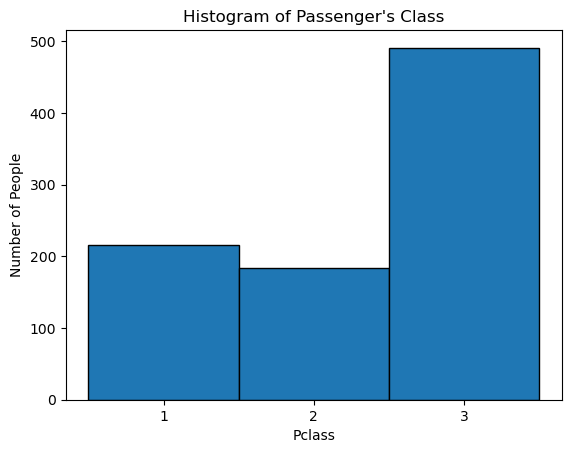

In [13]:
# Plot the histogram of Passenger's classes
pqr = pd.Series(df['Pclass'])
plot = plt.hist(pqr,range = (0.5,3.5), bins = 3, edgecolor = 'black')
plt.xticks([1,2,3])
# plt.yticks([100,200,300])
plt.xlabel("Pclass")
plt.ylabel("Number of People")
plt.title("Histogram of Passenger's Class")

In [14]:
# Comment about the impact of the sex of passengers
df[df['Sex']=='male']['Survived'].mean()

0.18890814558058924

In [15]:
df[df['Sex']=='female']['Survived'].mean()

0.7420382165605095

The survival rate of females is significantly higher than the survival rate of males.

In [17]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
embk = df.groupby('Embarked')
for a,b in embk:
    print("Percentage of people in group ",a," that survived:",df[df['Embarked']==a]['Survived'].mean())

Percentage of people in group  C  that survived: 0.5535714285714286
Percentage of people in group  Q  that survived: 0.38961038961038963
Percentage of people in group  S  that survived: 0.33695652173913043


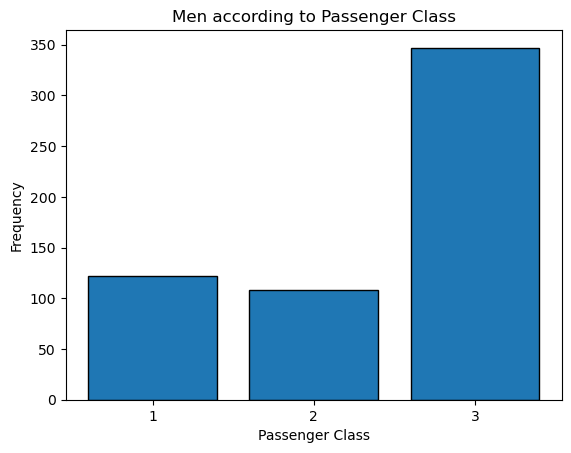

In [18]:
#Plot the histogram of the number of men in each class. Do the same for women. Comment.
men_count = df[df['Sex']=='male'].groupby('Pclass')
men_class_count =[]
men_class = []
for a,b in men_count:
    men_class.append(a)
    men_class_count.append(len(b))
# print(men_class_count)
plt.bar(men_class,men_class_count, edgecolor = 'black')
plt.xticks(men_class)
plt.title("Men according to Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Frequency")
plt.show()
# men_count.indices

Majority of Men were travelling in Passenger Class 3.

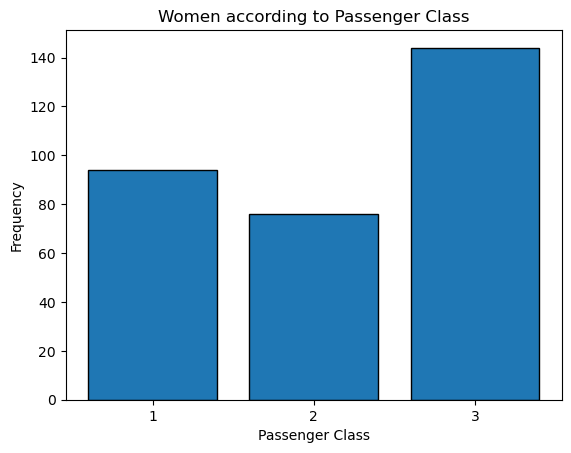

In [20]:
women_count = df[df['Sex']=='female'].groupby('Pclass')
women_class_count =[]
women_class = []
for a,b in women_count:
    women_class.append(a)
    women_class_count.append(len(b))
# print(women_class_count)
plt.bar(women_class,women_class_count, edgecolor = 'black')
plt.xticks(women_class)
plt.title("Women according to Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Frequency")
plt.show()

The majority of females were travelling in Passenger Class 3. The number of males and females in first class passenger is almost equal.

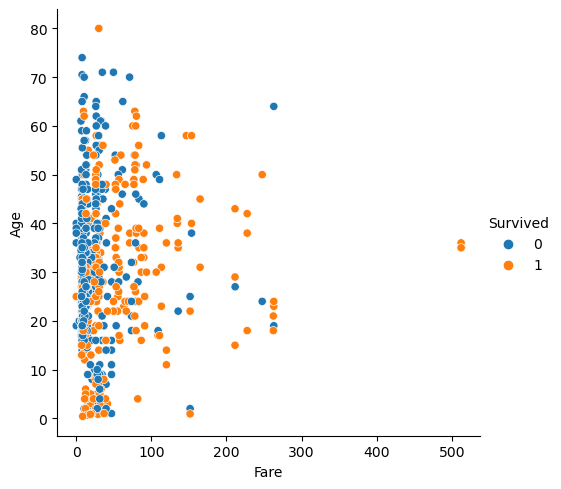

In [22]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived")

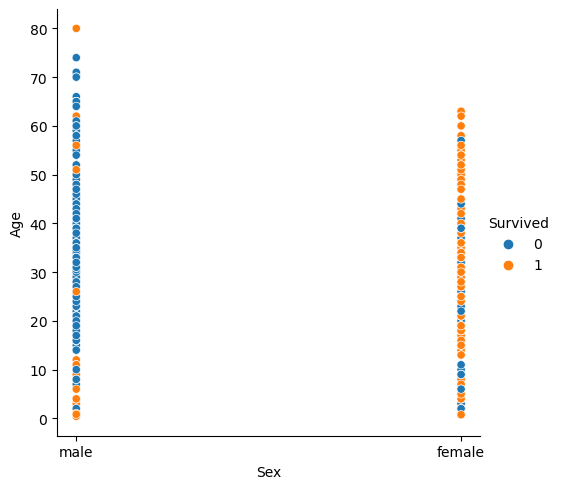

In [23]:
# In case you believe that other plots are interesting to vizualize the data set, you can provide them here.

sns.relplot(data=df,x="Sex", y="Age",hue="Survived")

The above plot shows that more proportion of females survived as compared to the proportion of males.

# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [27]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [28]:
# df["Cabin"].isnull().mean()

In [29]:
# What is the following code doing?
pd.get_dummies(df['Embarked'],dtype = int)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


The above code converts categorical text data into binary encoding where 0 represents the presence of a certain feature with respect to a passenger and 1 represents the absence of the feature with respect to the passenger.

In [31]:
# df

In [32]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked'],dtype=int)
new_df = pd.concat([df,ports],axis = 1)
df = new_df
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,0


In [33]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
df.drop(columns=["Sex","Embarked"],inplace = True)

In [34]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


<Axes: >

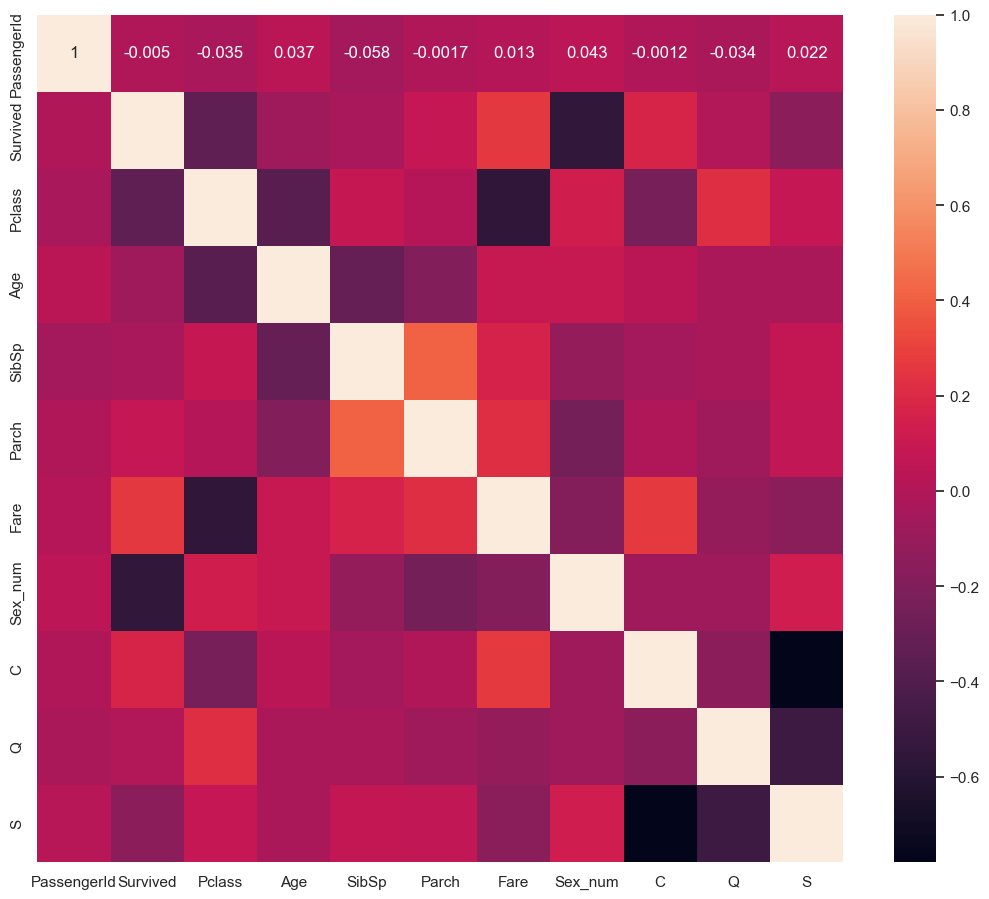

In [35]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc = {'figure.figsize':(13,11)})
sns.heatmap(df.select_dtypes(include = ['number']).corr(),annot=True)    #df.corr() gives the covariance matrix for the features.

The darkest and lightest cells show a stronger correlation, which can be seen along the diagonals where the correlation coefficients is all 1. Also we see that the survival of the passengers is strongly correlated to the sex_num which is the categorical encoding of sex. There seems to be a stronger negative correlation between the categorical encoding of the embarked places also.

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [38]:
# Do something smart to handle the problem of missing values in the "Age" column
empty_age_count = df["Age"].isnull().sum()
mean_age = df["Age"].mean()
std_age = df["Age"].std()
# print(std_age, mean_age)

#We fill up the missing values using data that are sampled from the normal distribution with parameters equalling mean and standard deviation of the present age data
values_to_fill = np.random.normal(mean_age,std_age,empty_age_count)
# values_to_fill

In [39]:
df.loc[df["Age"].isnull(), "Age"] = values_to_fill

In [40]:
columns = df.columns.tolist()
columns.remove("Ticket")
columns.remove("Cabin")
columns.remove("Name")
columns.remove("PassengerId")
columns.remove("Survived")

In [41]:
columns   #useful features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'C', 'Q', 'S']

In [42]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?
mycolumns = columns

The tickets of the passengers is unique and the cabin data has a lot of missing values and also we haven't encoded those values.

#Logistic regression


In [45]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns.
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)

The penalty = l2 means that we are using a L2 regualrization. The coefficient for the L2 regularization term is $\frac{1}{C}=1$ and max_iter gives the number of iterations used to find out the optimal parameters.

In [47]:
# Fit the model
lr.fit(df[mycolumns],df["Survived"])

LogisticRegression(max_iter=1000)

In [48]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters
lr.coef_,lr.intercept_

(array([[-1.01342369e+00, -3.02161422e-02, -2.86872220e-01,
         -7.90582586e-02,  2.16827088e-03, -2.62644258e+00,
          8.54917186e-02,  5.81735745e-02, -3.30121571e-01]]),
 array([4.63265609]))

The survival rate seems to be more dependent on Pclass and sex which was also observed in the correlation matrix.

# Performance evaluation


In [50]:
# Load the test datab
Xtest = pd.read_csv("testtitanic.csv")
ytest = pd.read_csv("gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

In [51]:
# Process the test features in order to obtain the same format as for the train set

dftest["Sex_num"] = (dftest["Sex"]=="male").astype("int")
ports1 = pd.get_dummies(Xtest['Embarked'],dtype=int)
new_df1 = pd.concat([dftest,ports1],axis = 1)
dftest = new_df1
dftest.drop(columns=["Sex","Embarked"],inplace = True)
# Xtest

In [52]:
empty_age_count1 = dftest["Age"].isnull().sum()
mean_age1 = dftest["Age"].mean()
std_age1 = dftest["Age"].std()
# print(std_age, mean_age)

values_to_fill1 = np.random.normal(mean_age1,std_age1,empty_age_count1)
dftest.loc[Xtest["Age"].isnull(), "Age"] = values_to_fill1
# dftest

In [53]:
# dftest

In [54]:
# Define a dataframe with only the columns you want to keep (and the label)
dftest=dftest[mycolumns+["Survived"]]
# dftest

In [55]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)

dftest.dropna(subset = "Fare", inplace = True)

dftest.isna().mean()

/var/folders/9w/2xc635vn7s7gppdk9mhgrnxc0000gn/T/ipykernel_69648/1882829097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest.dropna(subset = "Fare", inplace = True)


Pclass      0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Sex_num     0.0
C           0.0
Q           0.0
S           0.0
Survived    0.0
dtype: float64

In [56]:
# Compute the hard predictions on the test set (using only the columns to keep)
ypred = lr.predict(dftest[mycolumns])
# ypred

In [57]:
# ytest.drop(ind, inplace = True)


In [58]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(dftest["Survived"],ypred)
accuracy

0.9400479616306955

In [156]:
# Compute the soft predictions unsing predict_proba
soft_predict = lr.predict_proba(dftest[mycolumns])
soft_predict

array([[0.88094033, 0.11905967],
       [0.60577565, 0.39422435],
       [0.85994774, 0.14005226],
       [0.89671374, 0.10328626],
       [0.43580121, 0.56419879],
       [0.85410947, 0.14589053],
       [0.31851243, 0.68148757],
       [0.80836571, 0.19163429],
       [0.240551  , 0.759449  ],
       [0.92553886, 0.07446114],
       [0.84919377, 0.15080623],
       [0.66170449, 0.33829551],
       [0.07687075, 0.92312925],
       [0.92307429, 0.07692571],
       [0.15255201, 0.84744799],
       [0.1493959 , 0.8506041 ],
       [0.72972881, 0.27027119],
       [0.82741822, 0.17258178],
       [0.45592992, 0.54407008],
       [0.4173124 , 0.5826876 ],
       [0.67736382, 0.32263618],
       [0.84661663, 0.15338337],
       [0.07208927, 0.92791073],
       [0.37806463, 0.62193537],
       [0.09118904, 0.90881096],
       [0.95813019, 0.04186981],
       [0.04330161, 0.95669839],
       [0.83379468, 0.16620532],
       [0.62482085, 0.37517915],
       [0.93023891, 0.06976109],
       [0.

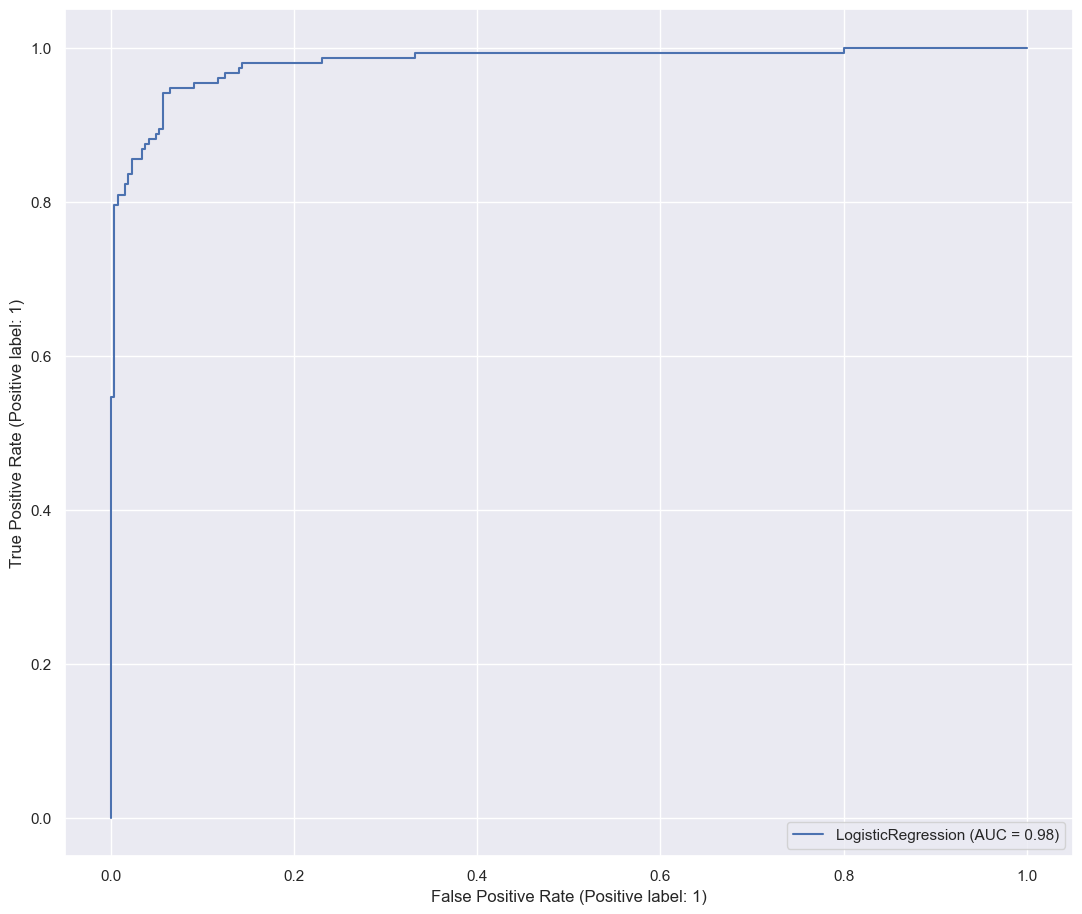

In [60]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr,dftest[mycolumns],dftest["Survived"])

# Bonus question: do whatever you find useful

Here are some examples:

*   Try to include useful elements of the Cabin number
*   Try different regularization parameters
* Try L1 regularization instead of ridge
* Try linear regression





# Linear Regression

In [63]:
#trying linear regression
from sklearn.linear_model import LinearRegression
ls = LinearRegression()


In [64]:
# df
linear_xtrain = df[mycolumns]
linear_ytrain = df["Survived"]
ls.fit(linear_xtrain,linear_ytrain)

LinearRegression()

In [65]:
ls.coef_,ls.intercept_

(array([-1.62905183e-01, -4.53605844e-03, -3.77622395e-02, -1.53258178e-02,
         3.11168921e-04, -5.08808543e-01, -7.68113801e-02, -8.07351667e-02,
        -1.41957717e-01]),
 1.3648145909070286)

In [66]:
linear_xtest = dftest[mycolumns]
linear_ytest = dftest["Survived"]

In [67]:
linear_predict = ls.predict(linear_xtest)
hard_prediction = [1 if i>0.5 else 0 for i in linear_predict]

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(hard_prediction,linear_ytest)

0.03357314148681055

In [70]:
np.array([linear_ytest == hard_prediction]).mean()    #calculating the accuracy of linear model

0.9664268585131894

In [71]:
# accuracy = accuracy_score(linear_ytest,hard_prediction)
# accuracy

### It seems that linear regression gives more accuracy than logistic regression for this dataset

# L1 regularization

In [74]:
lr_l1 = LogisticRegression(penalty='l1',C=1.0,max_iter=1000,solver='liblinear')

In [75]:
lr_l1.fit(df[mycolumns],df["Survived"])
lr_l1.coef_

array([[-0.95576569, -0.02799297, -0.28340142, -0.07905022,  0.00273087,
        -2.64588679,  0.0973723 ,  0.        , -0.27770556]])

In [76]:
lr_l1_predict = lr_l1.predict(dftest[mycolumns])
np.array([lr_l1_predict==dftest["Survived"]]).mean()

0.9424460431654677

The accuracy we obtain by using L1 regularization is around 94% which is a little higher than L2 in this case.

## Using different parameters for L2 regularization 
### (different values of the hyperparameter C)

In [79]:
a = np.linspace(0.05,20,50)
accuracy_list=[]

In [80]:
for i in a:
    lrr = LogisticRegression(penalty='l2',C=i,max_iter=1000)
    lrr.fit(df[mycolumns],df["Survived"])
    ypredd = lrr.predict(dftest[mycolumns])
    accuracy_list.append(accuracy_score(dftest["Survived"],ypredd))



In [81]:
# accuracy_list

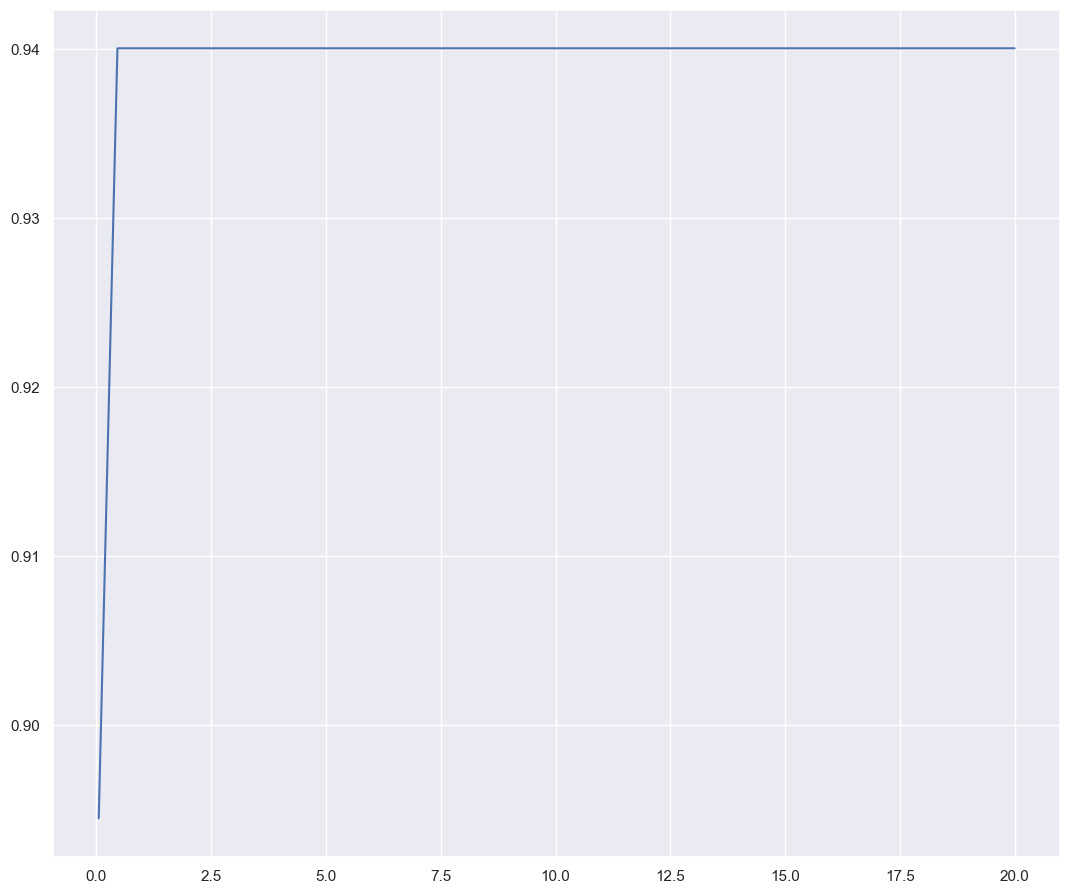

In [82]:
plt.plot(a,accuracy_list)

We empirically observe that we get the highest accuracy when our C value is around 1. A smaller C value would mean the coefficient of regularization to be too high which would in turn make the regularization term to be significantly higher than the error from the unsuitable use of parameters. i.e. a larger regularization coefficient overshadows the influence of independent feature values resulting in less accuracy score. However, with a higher C value (i.e. smaller regularization coefficient), the effect of the regularization is not seen as we do not penalize the model enough for unsuitable values due to a smaller regularization coefficient.

## Trying with Cabin Number

In [85]:
df["Cabin"].isnull().mean()

0.7710437710437711

Since 77 percent of the data is missing for Cabin, I decided not to proceed with using the Cabin Data for analysis.